## House Loan Payment
Group 4: Yuexuan Fu, Anika Kingsley, Henry Raymond, Xinye Xu, Yuxin Zhang

In [1]:
import numpy as np
import pandas as pd 
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data
train = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')

In [5]:
bureau.shape

(1716428, 17)

In [6]:
# numbers of records in bureau where SK_ID_CURR == 100002
len(bureau[bureau.SK_ID_CURR == 100002])

8

In [7]:
# Bureau : group by SK_ID_CURR, then count the numbers of SK_ID_BUREAU as the numbers of previous loans
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [12]:
train.shape

(307511, 122)

In [13]:
train.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [14]:
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [15]:
train.shape

(307511, 122)

In [16]:
# get percentage of missing values of each column in train
missing_values = train.isnull().sum()

missing_values_percent = 100 * train.isnull().sum() / len(train)

missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)

missing_values_table.rename(columns = {0 : 'Number of Missing Values', 1 : 'Percentage of Entries Missing'})

,Number of Missing Values,Percentage of Entries Missing
SK_ID_CURR,0,0.00
TARGET,0,0.00
NAME_CONTRACT_TYPE,0,0.00
CODE_GENDER,0,0.00
FLAG_OWN_CAR,0,0.00
FLAG_OWN_REALTY,0,0.00
CNT_CHILDREN,0,0.00
AMT_INCOME_TOTAL,0,0.00
AMT_CREDIT,0,0.00
AMT_ANNUITY,12,0.00


In [17]:
# drop the columns
train.drop(columns=['OWN_CAR_AGE',
                    'FLAG_MOBIL',
                    'FLAG_EMP_PHONE',
                    'FLAG_WORK_PHONE',
                    'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
                    'WEEKDAY_APPR_PROCESS_START',
                    'HOUR_APPR_PROCESS_START',
                    'REG_REGION_NOT_LIVE_REGION',
                    'REG_REGION_NOT_WORK_REGION',
                    'REG_CITY_NOT_LIVE_CITY',
                    'REG_CITY_NOT_WORK_CITY',
                    'LIVE_CITY_NOT_WORK_CITY',
                    'APARTMENTS_AVG',
                    'BASEMENTAREA_AVG',
                    'YEARS_BEGINEXPLUATATION_AVG',
                    'YEARS_BUILD_AVG',
                    'COMMONAREA_AVG',
                    'ELEVATORS_AVG',
                    'ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',
        'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE',
        'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE',
'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE',
'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'TOTALAREA_MODE',
'WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'DAYS_LAST_PHONE_CHANGE',
'FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_YEAR',
],inplace=True)

In [18]:
train.isna().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
LIVE_REGION_NOT_WORK_REGION         0
ORGANIZATION

In [19]:
# merge previous_loan_counts and train on SK_ID_CURR
train = pd.merge(train, previous_loan_counts, on='SK_ID_CURR', how='left')

In [20]:
#Fill NA in previous_loan_counts with 0 -- first time loan
train.previous_loan_counts.fillna("0",inplace=True)
#Fill NA in AMT_REQ_CREDIT_BUREAU_QRT with 0 -- No enquiries to Credit Bureau about the client 3 month before application
train.AMT_REQ_CREDIT_BUREAU_QRT.fillna("0",inplace=True)
# Drop rows where NA exists
train.dropna(how='any',subset=['AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','OCCUPATION_TYPE'],inplace=True)

In [21]:
EXT_SOURCE_1_avg = train.EXT_SOURCE_1.mean()
EXT_SOURCE_2_avg = train.EXT_SOURCE_2.mean()
EXT_SOURCE_3_avg = train.EXT_SOURCE_3.mean()

In [22]:
train.EXT_SOURCE_1.fillna(value=EXT_SOURCE_1_avg, inplace=True)
train.EXT_SOURCE_2.fillna(value=EXT_SOURCE_2_avg, inplace=True)
train.EXT_SOURCE_3.fillna(value=EXT_SOURCE_2_avg, inplace=True)

In [23]:
train.isna().sum().sum()

0

In [24]:
train.shape

(210201, 32)

In [25]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,previous_loan_counts
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,Laborers,1.00,2,2,0,Business Entity Type 3,0.08,0.26,0.14,0.00,8.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,Core staff,2.00,1,1,0,School,0.31,0.62,0.52,0.00,4.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,"-4,260.00",-2531,Laborers,1.00,2,2,0,Government,0.48,0.56,0.73,0.00,2.00
3,100006,0,Cash loans,F,N,Y,0,"135,000.00","312,682.50","29,686.50","297,000.00",Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,"-9,833.00",-2437,Laborers,2.00,2,2,0,Business Entity Type 3,0.48,0.65,0.52,0,0
4,100007,0,Cash loans,M,N,Y,0,"121,500.00","513,000.00","21,865.50","513,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,"-4,311.00",-3458,Core staff,1.00,2,2,0,Religion,0.48,0.32,0.52,0.00,1.00


In [26]:
train_dtypes = pd.DataFrame(train.dtypes.value_counts()).reset_index()
train_dtypes.columns = ['dtypes', 'column count']
train_dtypes

,dtypes,column count
0,object,13
1,float64,10
2,int64,9


In [27]:
train.loc[:, train.dtypes == np.object].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,previous_loan_counts
count,210201,210201,210201,210201,210201,210201,210201,210201,210201,210201,210201,"210,201.00",210201
unique,2,3,2,2,7,7,5,5,6,18,57,12.00,58
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,Business Entity Type 3,0.00,0
freq,188739,128749,130324,143273,171473,133306,146501,137413,183873,54970,53419,"147,935.00",29736


In [28]:
train = train.sample(frac=0.2)
train.shape

(42040, 32)

## EDA

Plotting the KDE (Kernel Density Estimation) of each feature against the target. This will allow us to see how the distribution of the target is influenced by the said feature, and would hence give us insights about the most important features to take into consideration.

In [29]:
#Defining a function to plot KDE plots

def plot_kde(train, col, reverse_scale = False):
    
    plt.figure(figsize = (12, 6))
    
    if reverse_scale == True:
        r = -1
    else:
        r = 1
    
    #KDE of paid loans (target == 0)
    sns.kdeplot(train.loc[train['TARGET'] == 0, col] * r, label = 'Target: 0', color = 'green', shade = True)
    #KDE of defaults (target == 1)
    sns.kdeplot(train.loc[train['TARGET'] == 1, col] * r, label = 'Target: 1', color = 'purple', shade = True)

    plt.xlabel('{}'.format(col)); plt.ylabel('KDE'); plt.title('KDE for column {}'.format(col));
    plt.show()
    plt.close()

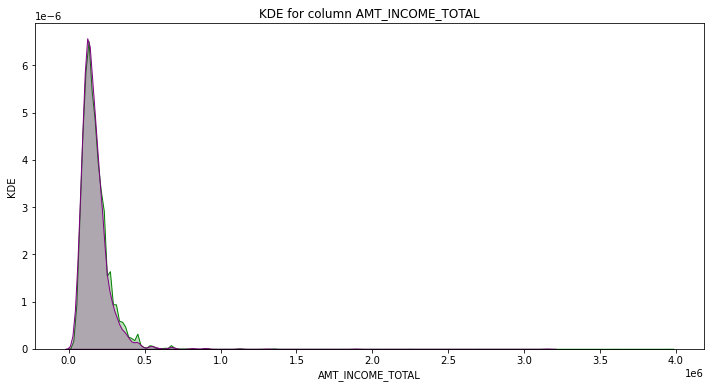

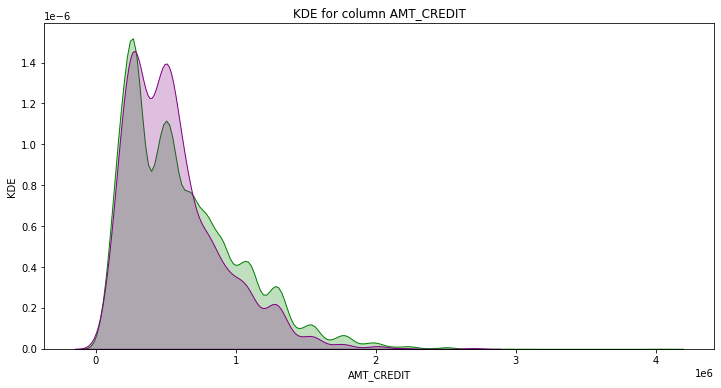

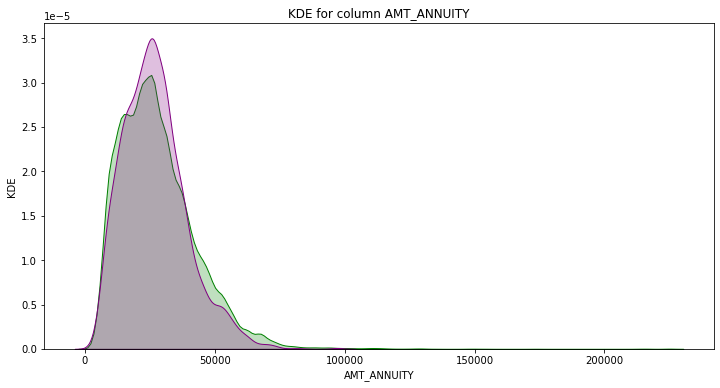

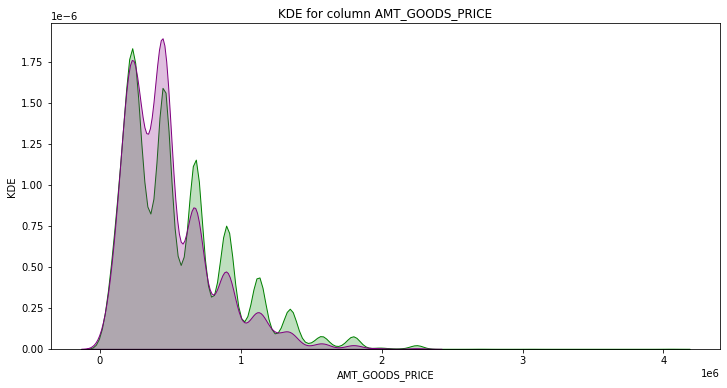

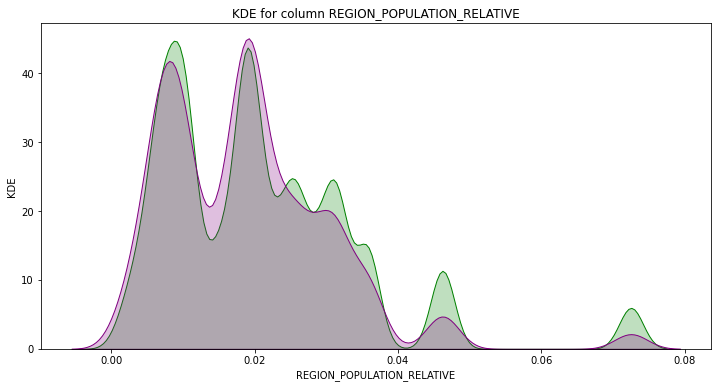

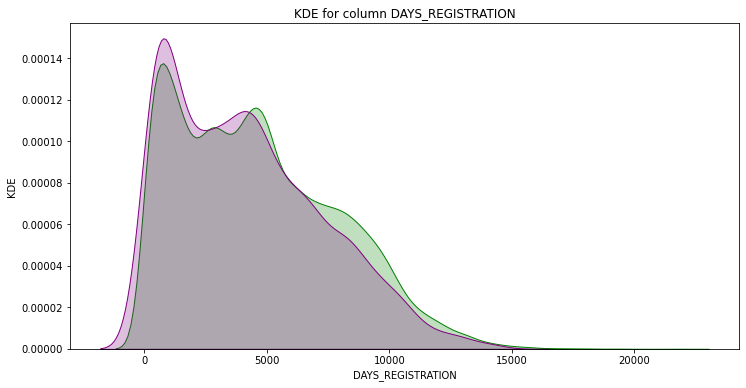

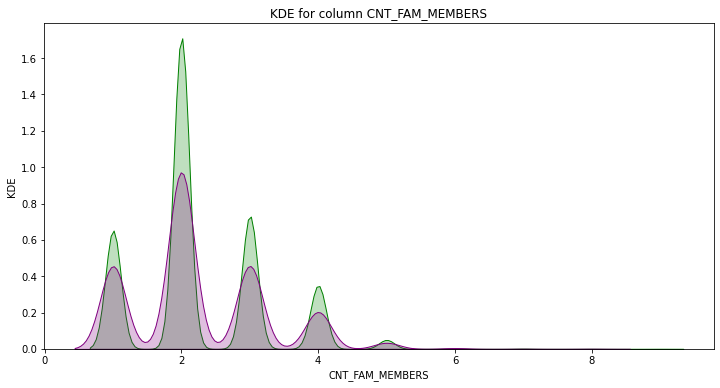

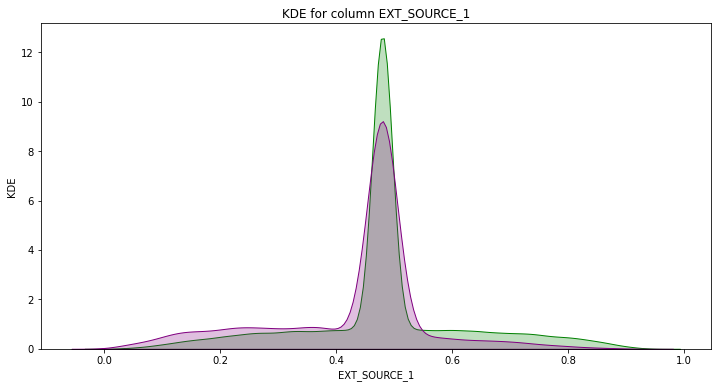

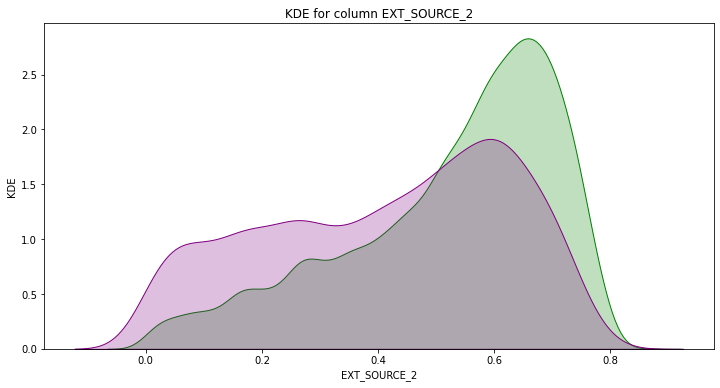

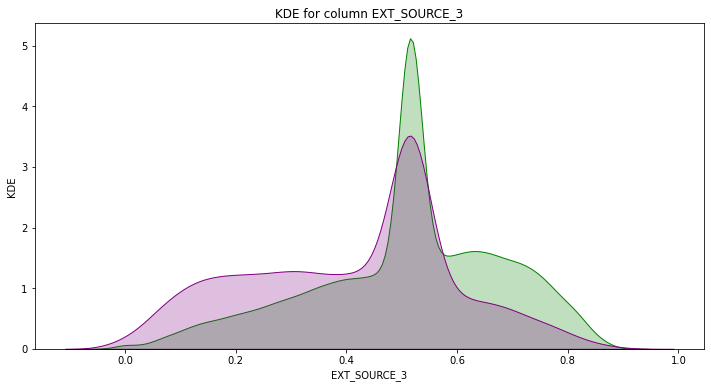

In [30]:
# iterate over all float (continuous) variables and plot KDE
for col in train.loc[:, (train.dtypes == np.float64)].columns.values:
    # do not plot target 
    if col != 'TARGET':
        # reverse axis if values are negative
        if (train[col].median() < 0):
            plot_kde(train,col, reverse_scale = True)
        else:
            plot_kde(train,col)

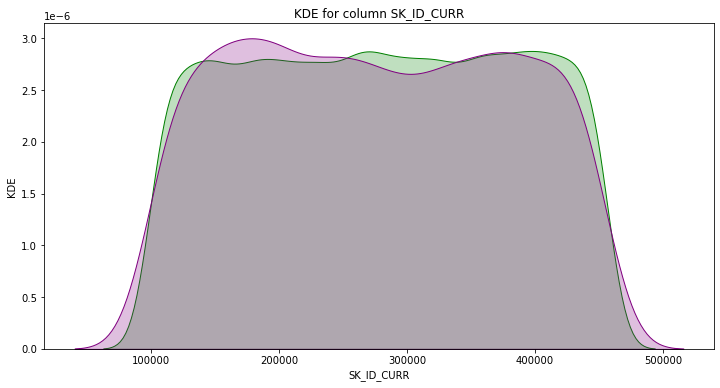

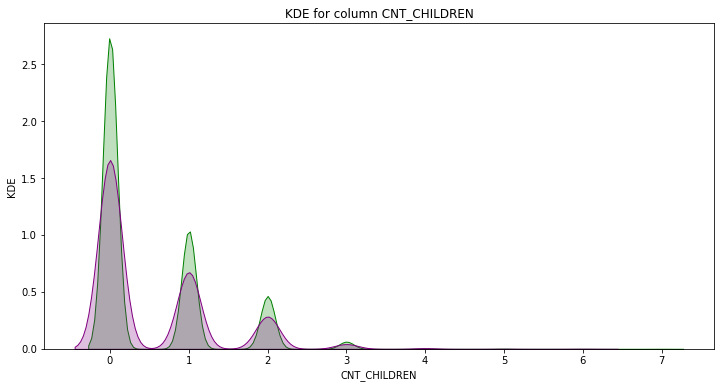

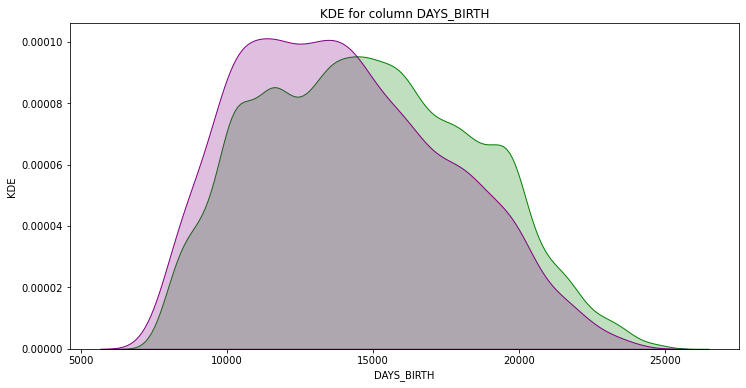

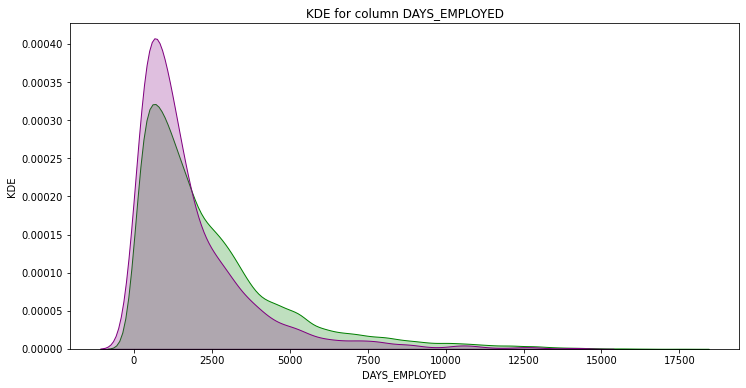

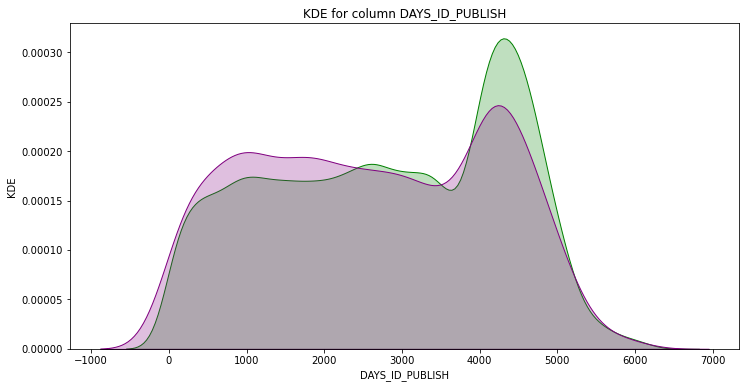

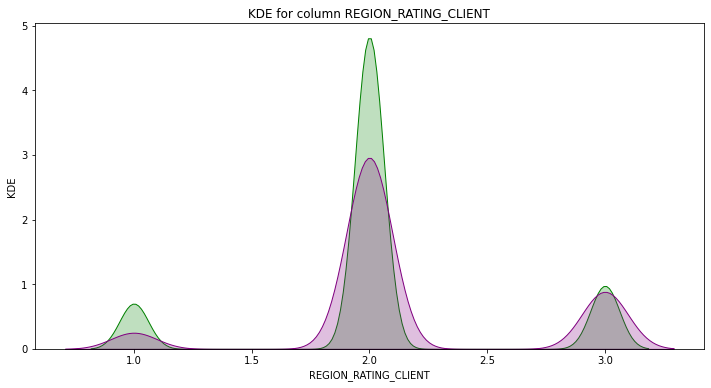

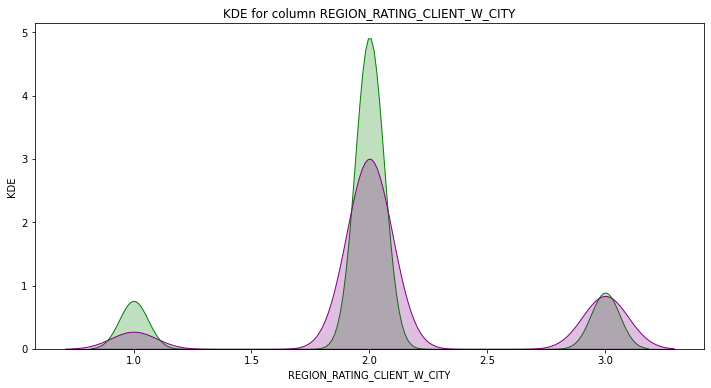

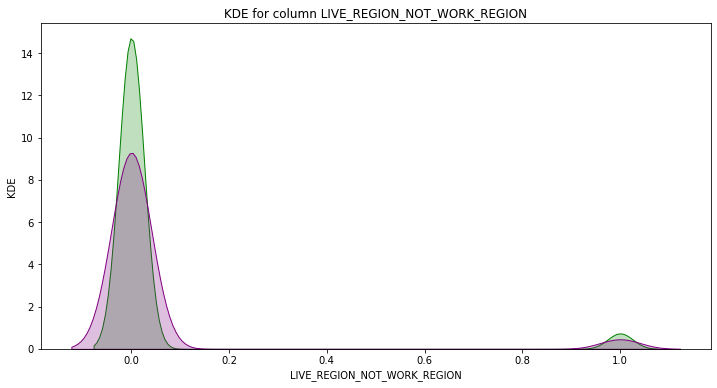

In [31]:
# iterate over all int64 variables and plot KDE
for col in train.loc[:, (train.dtypes == np.int64)].columns.values:
    # do not plot target 
    if col != 'TARGET':
        # reverse axis if values are negative
        if (train[col].median() < 0):
            plot_kde(train,col, reverse_scale = True)
        else:
            plot_kde(train,col)

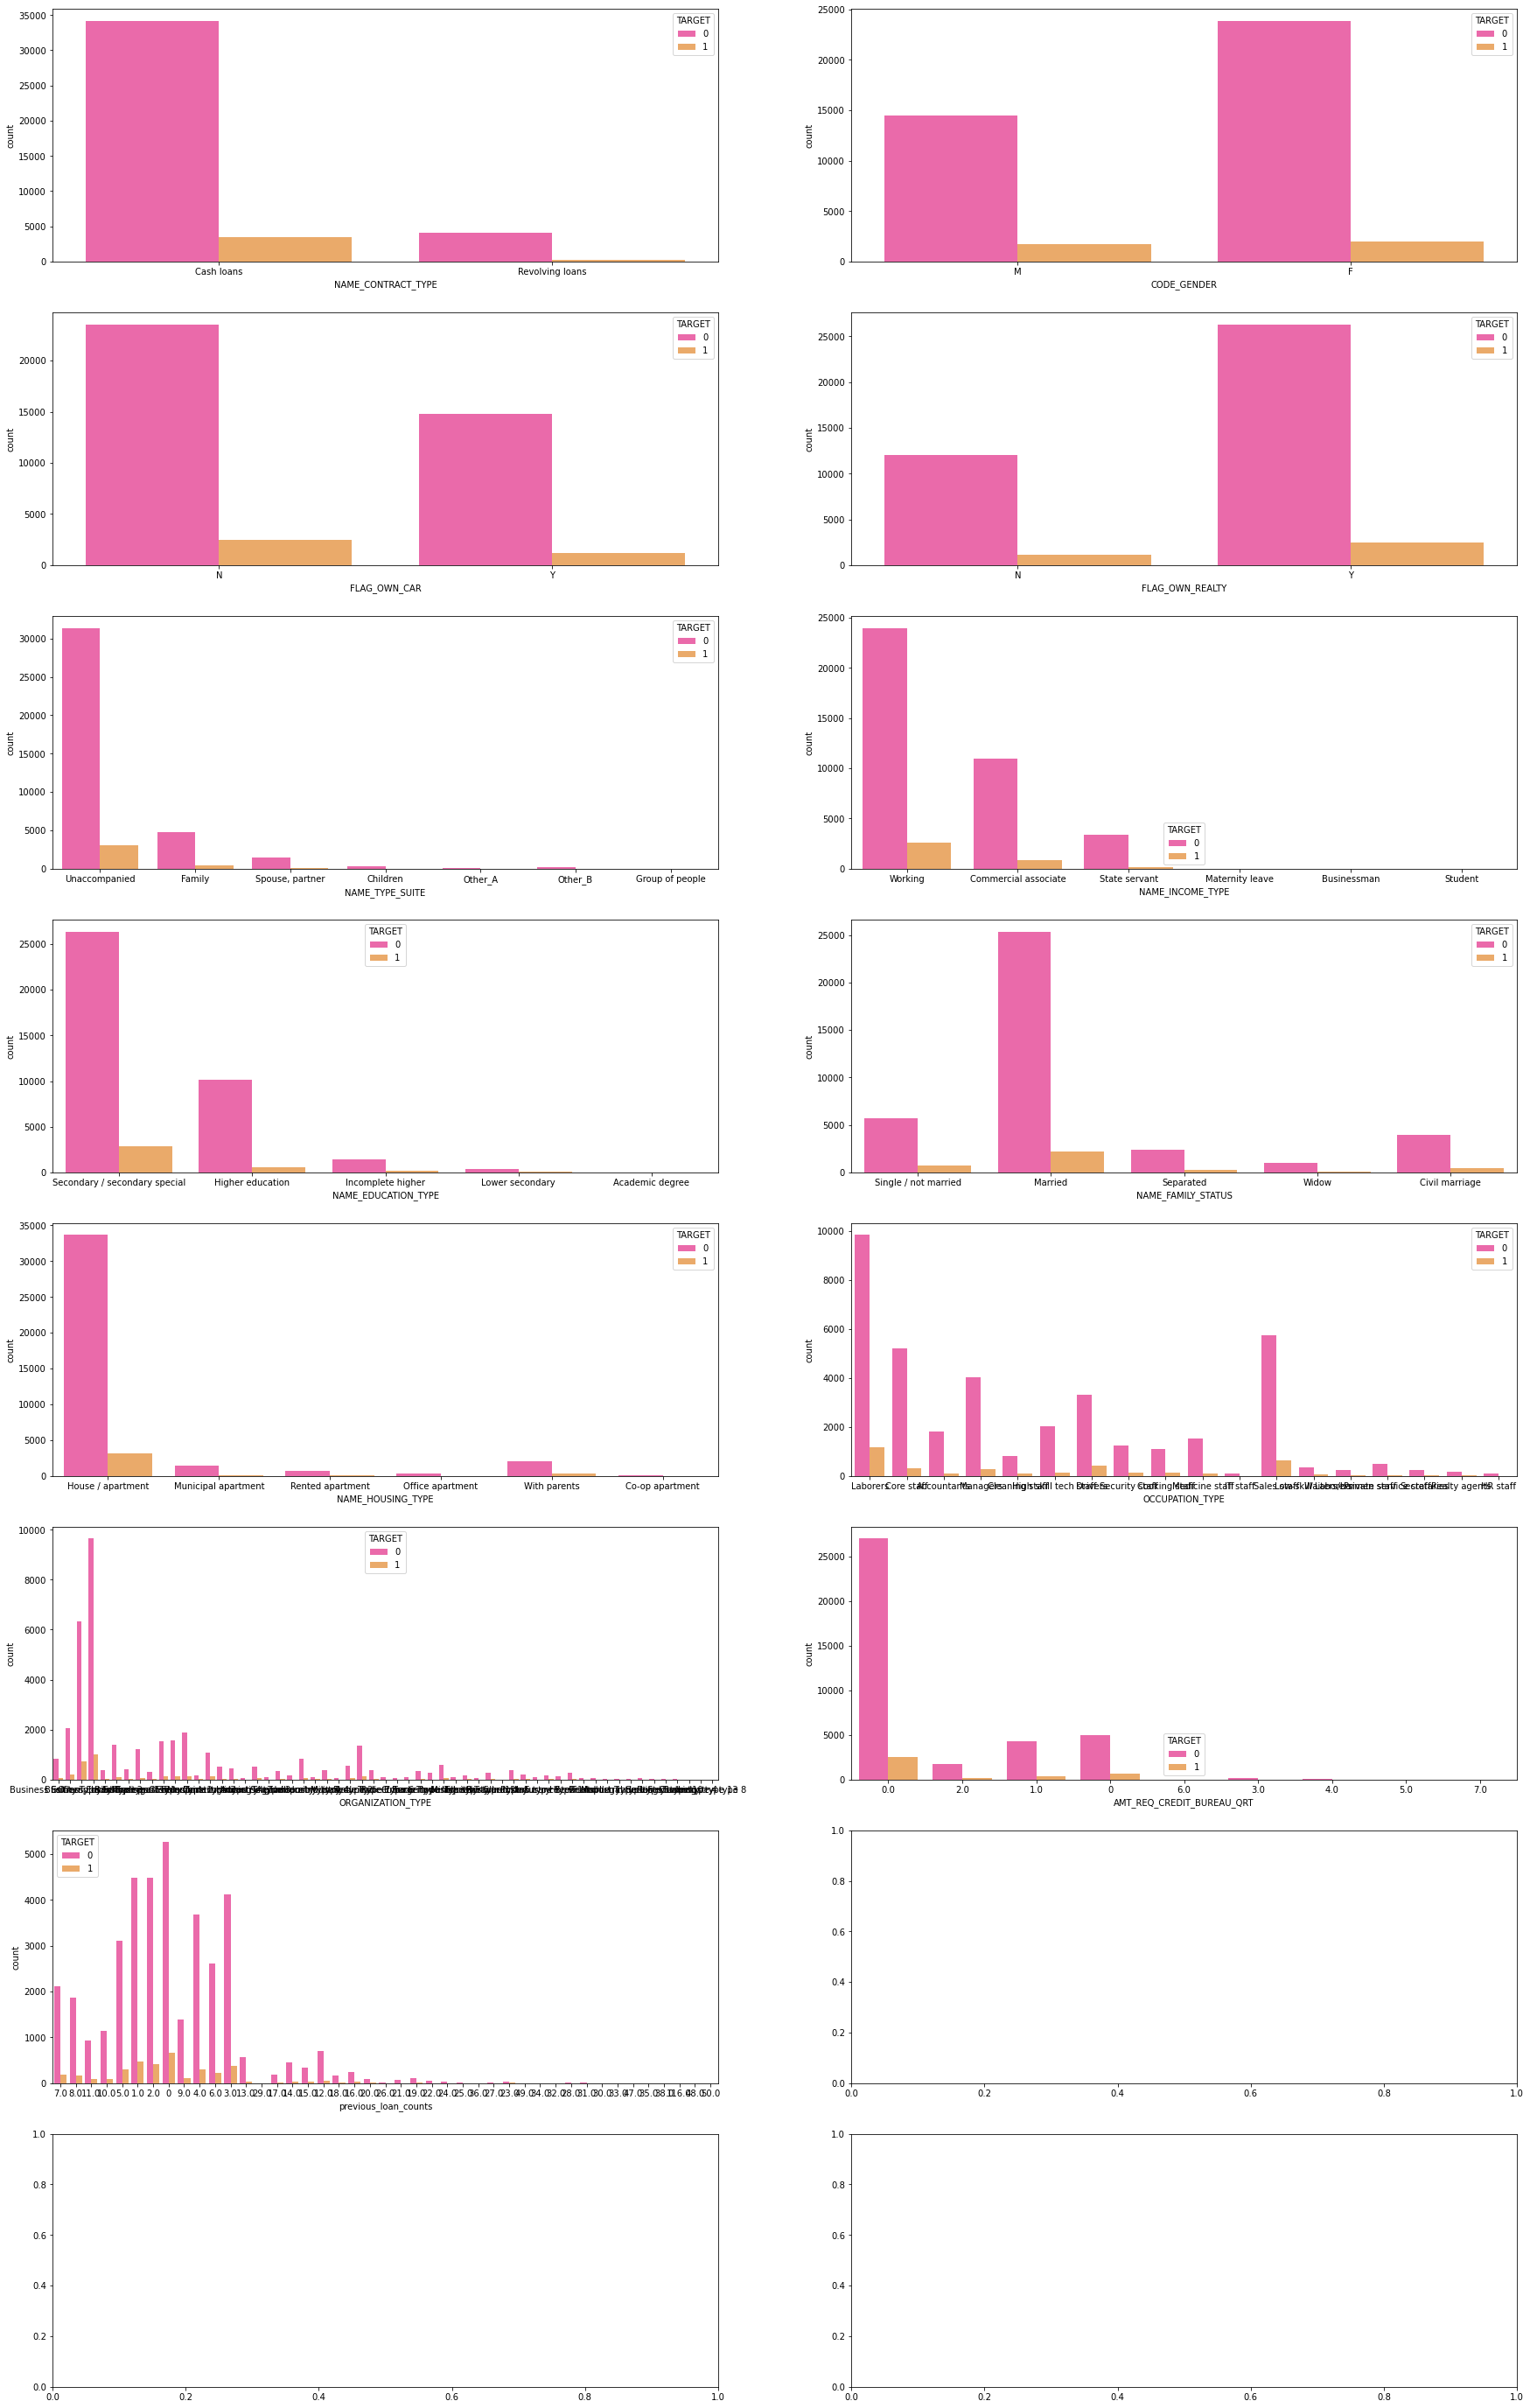

In [32]:
categorical_cols = train.select_dtypes(include=["object"]).columns.tolist()
fig, axs = plt.subplots(ncols=2,nrows=8,figsize=(30,50))
index=0
axs = axs.flatten()
for cols in categorical_cols:
        g = sns.countplot(x=cols,hue='TARGET',data=train,ax=axs[index],palette="spring")
        index +=1

In [33]:
# Defining function for plotting categorical bar charts for remaining variables
def plot_bars(train, col):
    
    plt.figure(figsize = (11, 5))
    
    train_high = train[train['TARGET'] == 1].groupby(col)['TARGET'].agg('count')
    train_var = train.groupby(col)['TARGET'].agg('count')
    categorical = train_high.divide(train_var, fill_value = 0) * 100

    # Convert back to df
    train_categorical = categorical.to_frame().reset_index().sort_values('TARGET', ascending = True)

    # Create plot in Plotly for interactive visualisation (with some Starling colours)
    ax = train_categorical.plot(x = col, y = 'TARGET', kind = 'barh', figsize=(10,10), color = 'purple')
    ax.set_xlabel('Percentage of defaulters %')
    ax.set_ylabel(col)
    plt.title('Percentage of defaulters plot for {}'.format(col.lower()));
    plt.show()
    plt.close()

<Figure size 792x360 with 0 Axes>

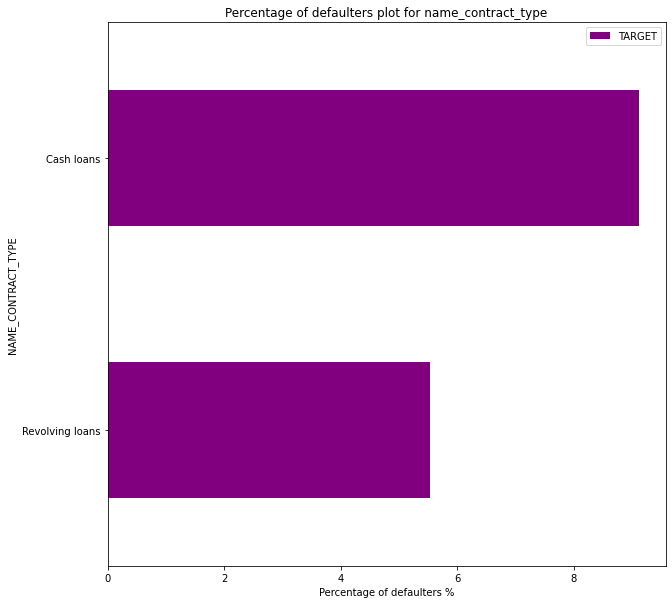

<Figure size 792x360 with 0 Axes>

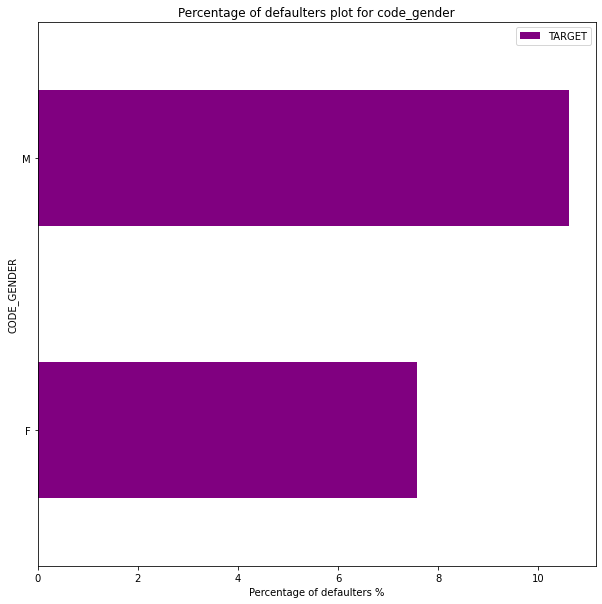

<Figure size 792x360 with 0 Axes>

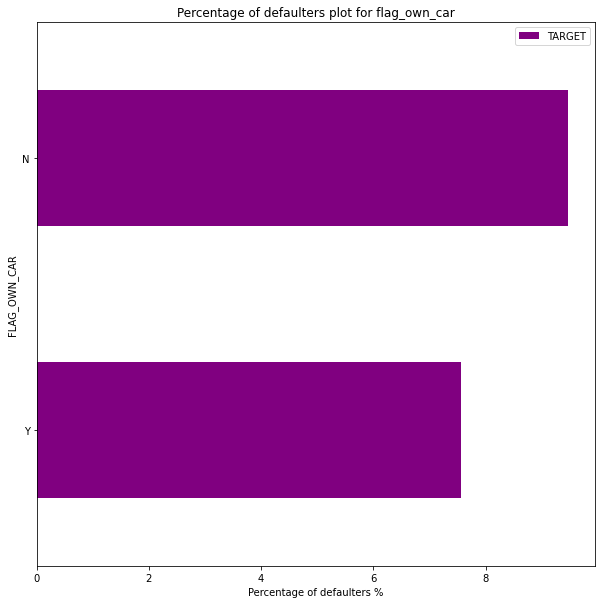

<Figure size 792x360 with 0 Axes>

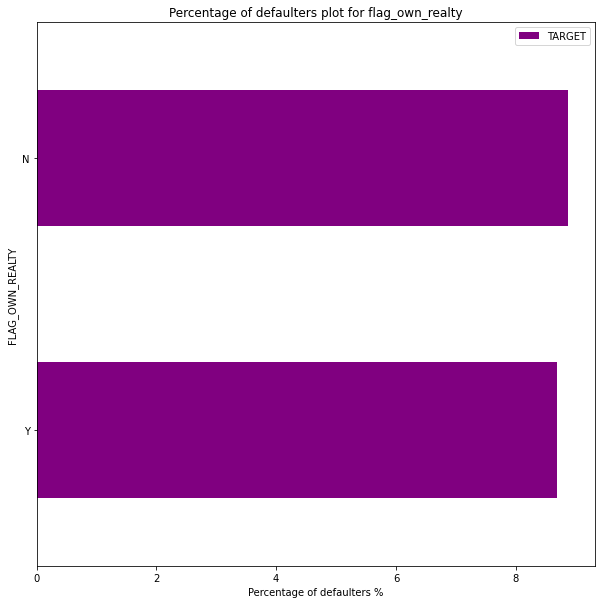

<Figure size 792x360 with 0 Axes>

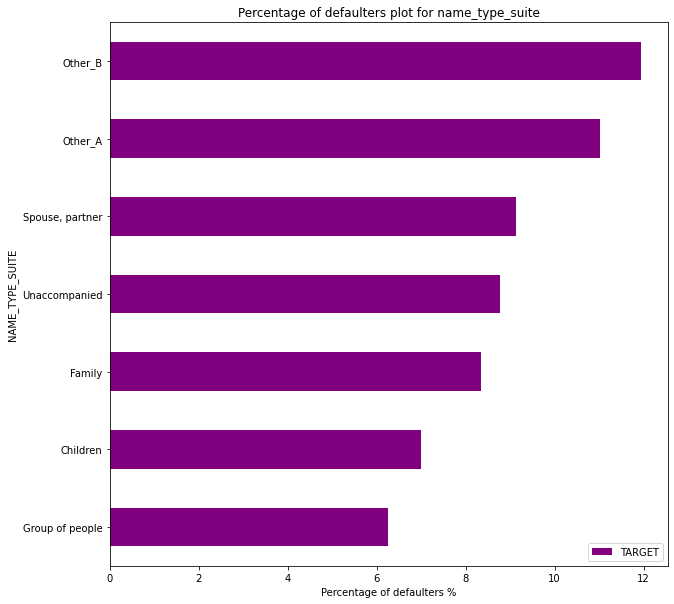

<Figure size 792x360 with 0 Axes>

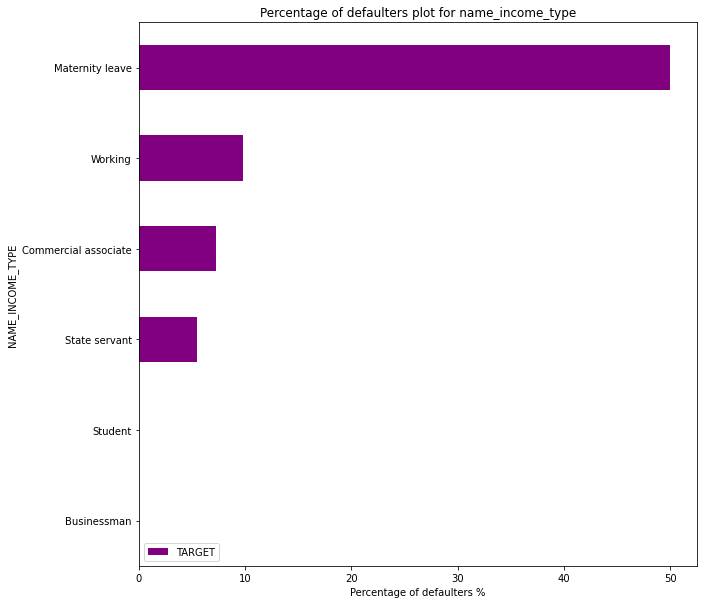

<Figure size 792x360 with 0 Axes>

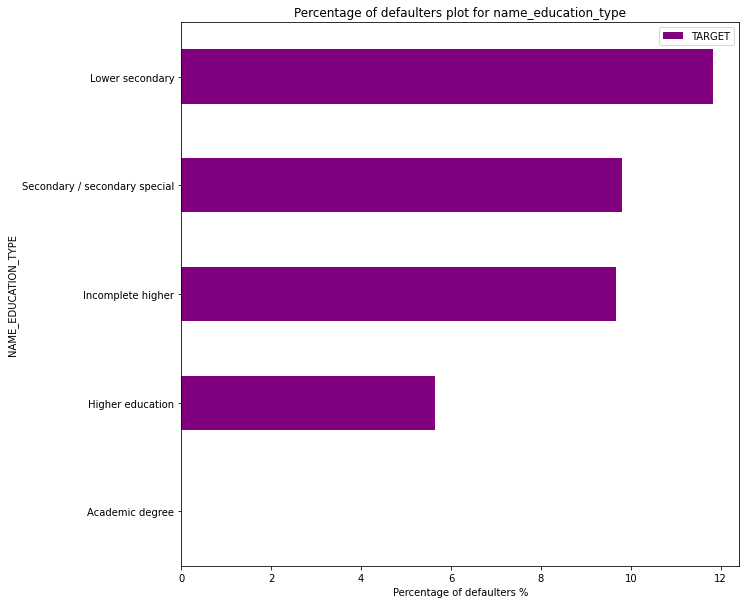

<Figure size 792x360 with 0 Axes>

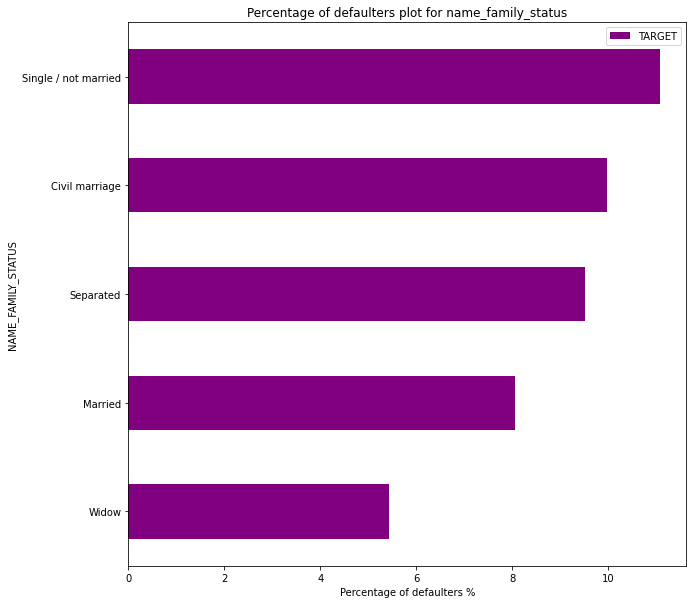

<Figure size 792x360 with 0 Axes>

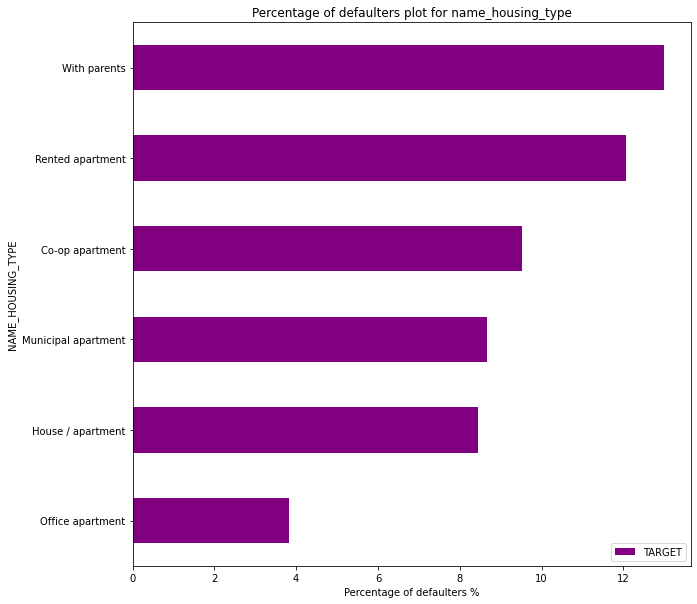

<Figure size 792x360 with 0 Axes>

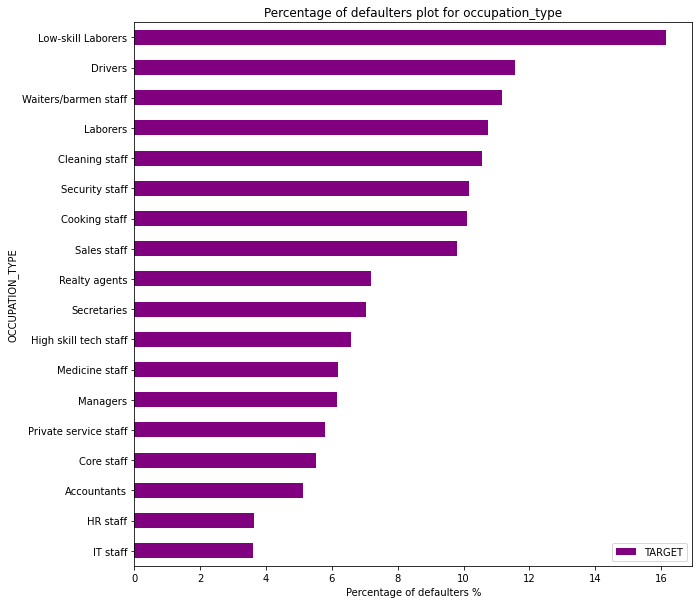

<Figure size 792x360 with 0 Axes>

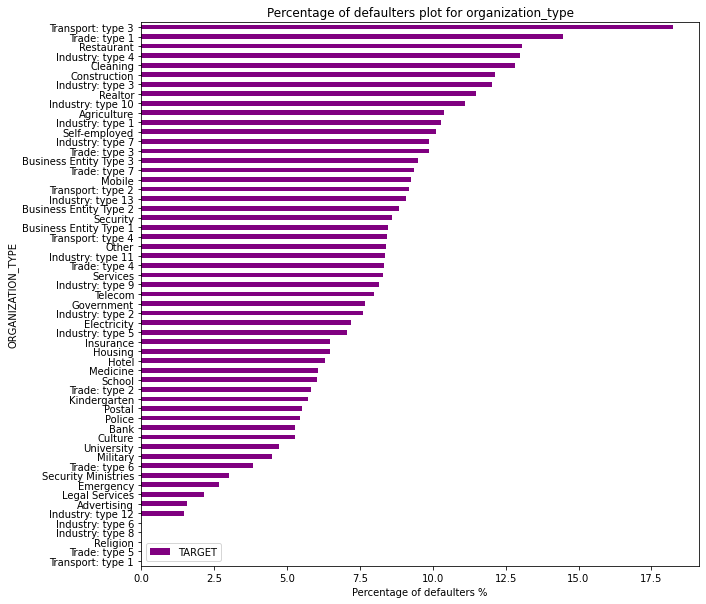

<Figure size 792x360 with 0 Axes>

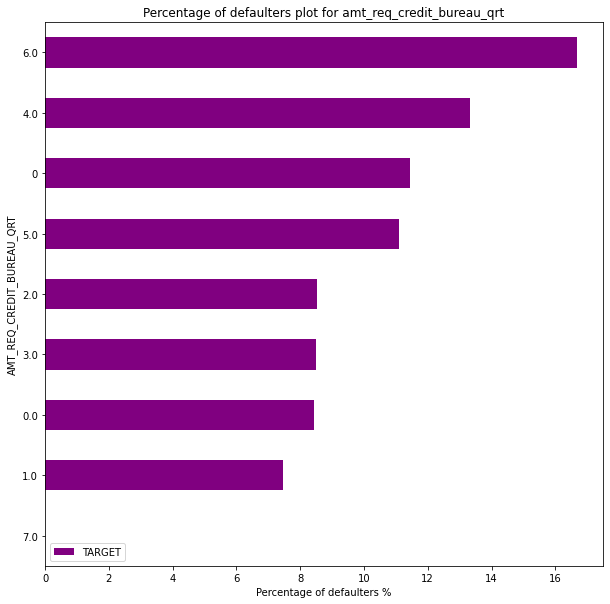

<Figure size 792x360 with 0 Axes>

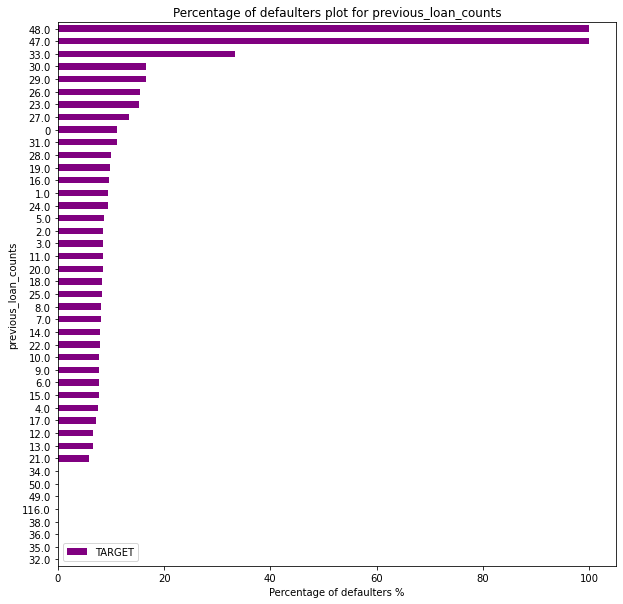

In [34]:
# iterate over object/categorical columns and plot
for col in train.loc[:, train.dtypes == np.object].columns.values:
    plot_bars(train, col)

In [35]:
# Extract the EXT_SOURCE variables and show correlations
ext = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
                     'EXT_SOURCE_3']]
ext_corrs = ext.corr()
ext_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.00,-0.11,-0.17,-0.16
EXT_SOURCE_1,-0.11,1.00,0.15,0.11
EXT_SOURCE_2,-0.17,0.15,1.00,0.11
EXT_SOURCE_3,-0.16,0.11,0.11,1.00


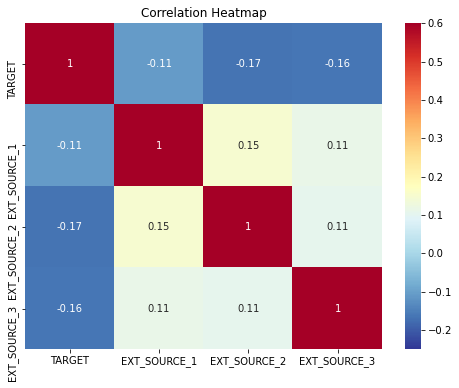

In [36]:
plt.figure(figsize=(8,6))

# Heatmap of correlations
sns.heatmap(ext_corrs, cmap=plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax=0.6)
plt.title('Correlation Heatmap');

In [37]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'previous_loan_counts'],
      dtype='object')

In [38]:
safe= train[train.TARGET == 0]
bad= train[train.TARGET == 1]
percentage = len(bad)/float(len(safe))
percentage
risky_loans = bad
safe_loans = safe.sample(frac = percentage, random_state = 1)
print( "Number of safe loans  : " , len(safe_loans))
print( "Number of risky loans : " , len(risky_loans))
# Append the risky_loans with the downsampled version of safe_loans 
train = risky_loans.append(safe_loans)

Number of safe loans  :  3675
Number of risky loans :  3675


## logistic regression

In [39]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [40]:
X = train[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'previous_loan_counts']]

In [41]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,previous_loan_counts
41572,148133,1,Cash loans,M,N,Y,1,"90,000.00","544,068.00","26,590.50","382,500.00",Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.02,-12200,-3083,"-1,076.00",-4296,Laborers,3.00,2,2,0,Self-employed,0.48,0.71,0.62,0.00,2.00
78635,191155,1,Cash loans,M,Y,Y,1,"180,000.00","369,720.00","27,031.50","292,500.00",Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.03,-14039,-1259,"-1,462.00",-1462,Drivers,3.00,2,2,0,Self-employed,0.75,0.61,0.52,0,0
69435,180530,1,Cash loans,M,N,Y,1,"135,000.00","405,000.00","19,827.00","405,000.00","Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.03,-14600,-1292,"-7,409.00",-10,Laborers,3.00,2,2,0,Business Entity Type 3,0.03,0.58,0.33,0.00,6.00
213866,347820,1,Cash loans,M,N,Y,2,"157,500.00","729,792.00","39,721.50","630,000.00","Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.03,-15280,-636,"-1,525.00",-1539,Laborers,4.00,2,2,0,Self-employed,0.48,0.47,0.52,1.00,1.00
245852,384506,1,Cash loans,M,Y,Y,1,"112,500.00","490,005.00","29,740.50","423,000.00",Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.02,-9053,-1244,"-7,227.00",-1655,Laborers,3.00,2,2,0,Business Entity Type 3,0.19,0.47,0.55,1.00,2.00


In [42]:
X.shape

(7350, 31)

In [43]:
y = train.TARGET

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [45]:
col_cat = ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
        'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 
       'OCCUPATION_TYPE', 
       'ORGANIZATION_TYPE']
col_num = ['SK_ID_CURR',   'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',  'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION',
 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'previous_loan_counts']

X_train_cat = X_train[col_cat]
X_train_num = X_train[col_num]
X_test_cat = X_test[col_cat]
X_test_num = X_test[col_num]

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))
pipe_num = make_pipeline(SimpleImputer(),MinMaxScaler())
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num))

In [47]:
pipe = make_pipeline(preprocessor, LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, max_iter=1000))

In [48]:
pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)
print('Accuracy score of the {} with MinMaxScaler is {:.3f}'.format(pipe.__class__.__name__, accuracy))

Accuracy score of the Pipeline with MinMaxScaler is 0.694


In [49]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                     'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                     'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                                     'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                     'NAME_HOUSING_TYPE', 'OCCUPA...
                                     'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                     'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                     'REGION_POPULATION_REL

In [50]:
from sklearn.svm import LinearSVC
clf = make_pipeline(preprocessor, LinearSVC(C=1.0, max_iter=500000))
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the Pipeline is 0.699


##  Cross Validation

In [51]:
from sklearn.model_selection import cross_validate

pipe = make_pipeline(preprocessor, LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, max_iter=1000))
scores = cross_validate(pipe, X, y, cv=3, return_train_score=True)

In [52]:
df_scores = pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_score,train_score
0,0.24,0.02,0.68,0.70
1,0.20,0.02,0.68,0.69
2,0.21,0.02,0.68,0.70


In [53]:
print("Mean times and scores:\n", df_scores.mean())

Mean times and scores:
 fit_time      0.22
score_time    0.02
test_score    0.68
train_score   0.70
dtype: float64


<AxesSubplot:>

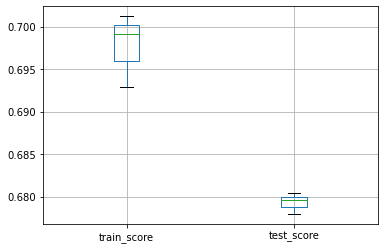

In [54]:
df_scores[['train_score', 'test_score']].boxplot()

##  Hyper-parameters optimization: fine-tune the inside of a pipeline using GridSearchCV

In [55]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                     'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                     'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                                     'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                     'NAME_HOUSING_TYPE', 'OCCUPA...
                                     'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                     'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                     'REGION_POPULATION_REL

In [56]:
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(preprocessor, LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, max_iter=1000))

param_grid = {'logisticregression__C': [0.1, 1.0, 10],
              'logisticregression__penalty': ['l2', 'l1']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['NAME_CONTRACT_TYPE',
                                                                          'CODE_GENDER',
                                                                          'FLAG_OWN_CAR',
                                                                          'FLAG_OWN_

In [57]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.24,0.02,0.05,0.01,0.10,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.68,0.67,0.67,0.68,0.00,1,0.69,0.70,0.70,0.70,0.00
1,0.11,0.00,0.00,0.00,0.10,l1,"{'logisticregression__C': 0.1, 'logisticregres...",nan,nan,nan,nan,nan,4,nan,nan,nan,nan,nan
2,0.46,0.00,0.03,0.00,1.00,l2,"{'logisticregression__C': 1.0, 'logisticregres...",0.68,0.66,0.68,0.67,0.01,2,0.70,0.70,0.70,0.70,0.00
3,0.13,0.01,0.00,0.00,1.00,l1,"{'logisticregression__C': 1.0, 'logisticregres...",nan,nan,nan,nan,nan,5,nan,nan,nan,nan,nan
4,0.54,0.03,0.02,0.00,10,l2,"{'logisticregression__C': 10, 'logisticregress...",0.68,0.66,0.67,0.67,0.00,3,0.70,0.71,0.70,0.70,0.00
5,0.09,0.00,0.00,0.00,10,l1,"{'logisticregression__C': 10, 'logisticregress...",nan,nan,nan,nan,nan,6,nan,nan,nan,nan,nan


In [58]:
param_grid

{'logisticregression__C': [0.1, 1.0, 10],
 'logisticregression__penalty': ['l2', 'l1']}

In [59]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_logisticregression__C', columns='param_logisticregression__penalty')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))

In [60]:
res

param_logisticregression__penalty,l2
0.10,0.68
1.00,0.67
10.00,0.67


<AxesSubplot:xlabel='param_logisticregression__penalty'>

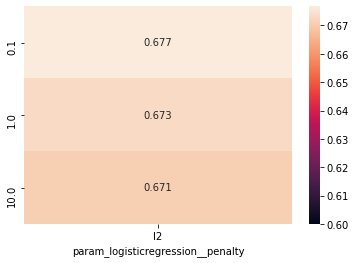

In [61]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

In [62]:
grid.best_params_

{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}

In [63]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
         

In [64]:
best_param_grid = {'logisticregression__C': [10],
              'logisticregression__penalty': ['l2']}
model_log = GridSearchCV(pipe,best_param_grid,return_train_score=True, cv=3, n_jobs=-1)
model_log.fit(X_test, y_test)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['NAME_CONTRACT_TYPE',
                                                                          'CODE_GENDER',
                                                                          'FLAG_OWN_CAR',
                                                                          'FLAG_OWN_

In [65]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,balanced_accuracy_score,roc_auc_score

model_log_predicted = model_log.predict(X_test)

print('Accuracy of model_rf: {:.2f}'.format(accuracy_score(y_test, model_log_predicted)))
print('Precision of model_rf: {:.2f}'.format(precision_score(y_test, model_log_predicted)))
print('Recall of model_rf: {:.2f}'.format(recall_score(y_test, model_log_predicted)))
print('F1 of model_rf: {:.2f}'.format(f1_score(y_test, model_log_predicted)))
print('Balanced accuracy score of model_rf: {:.2f}'.format(balanced_accuracy_score(y_test, model_log_predicted)))
print('Roc auc score of model_rf: {:.2f}'.format(roc_auc_score(y_test, model_log_predicted)))

Accuracy of model_rf: 0.71
Precision of model_rf: 0.71
Recall of model_rf: 0.72
F1 of model_rf: 0.72
Balanced accuracy score of model_rf: 0.71
Roc auc score of model_rf: 0.71


In [66]:
model_log_predicted.shape

(1838,)

In [67]:
y_test.shape

(1838,)

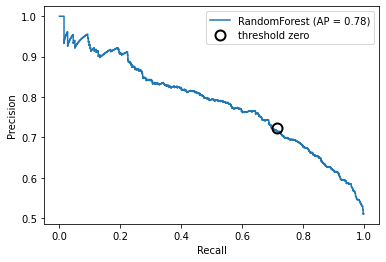

In [68]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, precision_recall_fscore_support

pr_mlp = plot_precision_recall_curve(model_log, X_test, y_test, name='RandomForest')
# also compute the precision/recall trade-off from predict
p_mlp, r_mlp, _, _ = precision_recall_fscore_support(y_test, model_log_predicted, average='binary') 
#plot the dot on the graph

plt.plot(p_mlp, r_mlp, 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend()

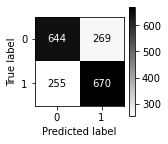

In [69]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion = confusion_matrix(y_test, model_log_predicted)
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(model_log, X_test, y_test, cmap='gray_r', ax=ax)

In [70]:
FN = confusion[0,1]
FN

269

In [71]:
FP = confusion[1,0]
FP

255

In [72]:
print("Logistic regression step:\n{}".format(
      grid.best_estimator_.named_steps["logisticregression"]))

Logistic regression step:
LogisticRegression(C=0.1, max_iter=1000, random_state=42)


In [73]:
print("Logistic regression coefficients:\n{}".format(
      grid.best_estimator_.named_steps["logisticregression"].coef_))

Logistic regression coefficients:
[[ 0.26035916 -0.26010932 -0.1275062   0.12775603  0.16666128 -0.16641144
  -0.06755851  0.06780834 -0.02081135 -0.12501519  0.03796129  0.1461764
  -0.01469523  0.04120381 -0.06456989 -0.10367328  0.05957463 -0.01561478
   0.05996328 -0.05500178 -0.10683002  0.04431992  0.01710449  0.10065722
   0.04119067 -0.10855074  0.06185665  0.21488047 -0.2091272  -0.13168018
  -0.07349457  0.33148153 -0.44350975  0.10444478  0.21300804 -0.18875291
   0.07215232  0.04122435 -0.19337327  0.11376973 -0.02833371 -0.23175606
  -0.10300535  0.07296662  0.37342876 -0.07848819 -0.21966288 -0.09799794
  -0.10296319  0.07909835  0.05948979  0.33140407  0.10104935 -0.07462552
   0.10967145 -0.19628736  0.08393989  0.17106659  0.1282397   0.12431936
   0.24250839 -0.03564072 -0.09343453 -0.14236034 -0.01667207 -0.15302413
  -0.27561952  0.02200848  0.01497443  0.10703312 -0.06833802  0.01609469
  -0.13115532  0.40354218  0.06200446 -0.22808867 -0.02641311  0.1557156
  -0.0

In [74]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.696


In [75]:
scores = cross_validate(grid, X, y, cv=3, n_jobs=-1, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_score,train_score
0,3.82,0.01,0.68,0.70
1,3.36,0.03,0.68,0.69
2,3.36,0.02,0.68,0.70


## decision tree

In [76]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
pipe1 = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=2, criterion='entropy'))
pipe2 = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=6, criterion='entropy'))
pipe3 = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=10, criterion='entropy'))


pipe1.fit(X_train, y_train)
accuracy = pipe1.score(X_test, y_test)
print('Accuracy score of the decision tree of depth 2 {} is {:.5f}'.format(pipe1.__class__.__name__, accuracy))

pipe2.fit(X_train, y_train)
accuracy = pipe2.score(X_test, y_test)
print('Accuracy score of the decision tree of depth 6 {} is {:.5f}'.format(pipe2.__class__.__name__, accuracy))

pipe3.fit(X_train, y_train)
accuracy = pipe3.score(X_test, y_test)
print('Accuracy score of the decision tree of depth 10 {} is {:.5f}'.format(pipe3.__class__.__name__, accuracy))

Accuracy score of the decision tree of depth 2 Pipeline is 0.62514
Accuracy score of the decision tree of depth 6 Pipeline is 0.67084
Accuracy score of the decision tree of depth 10 Pipeline is 0.63602


## Random forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
np.set_printoptions(precision=6, suppress=True)
param_grid = {'randomforestclassifier__max_features': [2,4,6,8,10],
              'randomforestclassifier__max_depth': [6,8,10,12,14]}
param_grid

{'randomforestclassifier__max_features': [2, 4, 6, 8, 10],
 'randomforestclassifier__max_depth': [6, 8, 10, 12, 14]}

In [78]:
pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))
pipe_num = make_pipeline(SimpleImputer())
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num))
rf = RandomForestClassifier()
pipe_rf = make_pipeline(preprocessor, rf)
pipe_rf.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                     'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                     'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                                     'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                     'NAME_HOUSING_TYPE', 'OCCUPA...
                                     'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                     'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                     'REGION_POPULATION_REL

In [79]:
from sklearn.model_selection import GridSearchCV

grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid, cv=3, return_train_score=True)
grid_rf.fit(X_train, y_train)

print(f"best parameters: {grid_rf.best_params_}")

print(f"test-set score: {grid_rf.score(X_test, y_test):.3f}")

best parameters: {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__max_features': 10}
test-set score: 0.699


In [80]:
grid_rf.best_params_

{'randomforestclassifier__max_depth': 12,
 'randomforestclassifier__max_features': 10}

In [81]:
res_rf = pd.pivot_table(pd.DataFrame(grid_rf.cv_results_), values='mean_test_score', index='param_randomforestclassifier__max_features', columns='param_randomforestclassifier__max_depth')
pd.set_option("display.precision",3)
res_rf = res_rf.set_index(res_rf.index.values.round(4))

In [82]:
res

param_logisticregression__penalty,l2
0.10,0.68
1.00,0.67
10.00,0.67


<AxesSubplot:xlabel='param_logisticregression__penalty'>

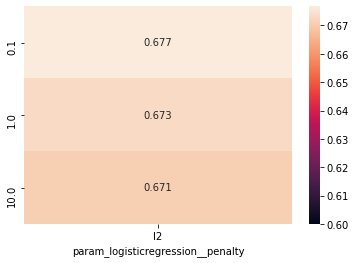

In [83]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

In [84]:
#grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid, cv=3, return_train_score=True)

best_param_grid = {'randomforestclassifier__max_features': [2],
              'randomforestclassifier__max_depth': [6]}
model_rf = GridSearchCV(pipe_rf,best_param_grid,return_train_score=True, cv=3, n_jobs=-1)
model_rf.fit(X_test, y_test)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['NAME_CONTRACT_TYPE',
                                                                          'CODE_GENDER',
                                                                          'FLAG_OWN_CAR',
                                                                          'FLAG_OWN_

In [85]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,balanced_accuracy_score,roc_auc_score

model_rf_predicted = model_rf.predict(X_test)

print('Accuracy of model_rf: {:.2f}'.format(accuracy_score(y_test, model_rf_predicted)))
print('Precision of model_rf: {:.2f}'.format(precision_score(y_test, model_rf_predicted)))
print('Recall of model_rf: {:.2f}'.format(recall_score(y_test, model_rf_predicted)))
print('F1 of model_rf: {:.2f}'.format(f1_score(y_test, model_rf_predicted)))
print('Balanced accuracy score of model_rf: {:.2f}'.format(balanced_accuracy_score(y_test, model_rf_predicted)))
print('Roc auc score of model_rf: {:.2f}'.format(roc_auc_score(y_test, model_rf_predicted)))

Accuracy of model_rf: 0.78
Precision of model_rf: 0.76
Recall of model_rf: 0.83
F1 of model_rf: 0.79
Balanced accuracy score of model_rf: 0.78
Roc auc score of model_rf: 0.78


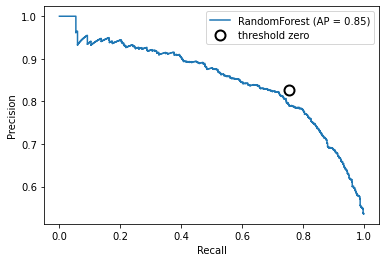

In [86]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, precision_recall_fscore_support

pr_mlp = plot_precision_recall_curve(model_rf, X_test, y_test, name='RandomForest')
# also compute the precision/recall trade-off from predict
p_mlp, r_mlp, _, _ = precision_recall_fscore_support(y_test, model_rf_predicted, average='binary') 
#plot the dot on the graph

plt.plot(p_mlp, r_mlp, 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend()

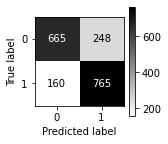

In [87]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion = confusion_matrix(y_test, model_rf_predicted)
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(model_rf, X_test, y_test, cmap='gray_r', ax=ax)

In [88]:
FN = confusion[0,1]
FN

248

In [89]:
FP = confusion[1,0]
FP

160

## Feature Importances

In [96]:
rf = RandomForestClassifier(max_depth = 6 , max_leaf_nodes = 9).fit(X_train_num,y_train)

In [101]:
importances = rf.feature_importances_
feature_names = [f"{i}" for i in X_train_num.columns.values]

In [109]:
rf_importances = pd.Series(importances, index= feature_names)
rf_importances.sort_values(ascending = False, inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'EXT_SOURCE_3'),
  Text(1, 0, 'EXT_SOURCE_2'),
  Text(2, 0, 'EXT_SOURCE_1'),
  Text(3, 0, 'DAYS_EMPLOYED'),
  Text(4, 0, 'AMT_GOODS_PRICE'),
  Text(5, 0, 'DAYS_BIRTH'),
  Text(6, 0, 'AMT_CREDIT'),
  Text(7, 0, 'REGION_POPULATION_RELATIVE'),
  Text(8, 0, 'REGION_RATING_CLIENT_W_CITY'),
  Text(9, 0, 'AMT_ANNUITY'),
  Text(10, 0, 'DAYS_REGISTRATION'),
  Text(11, 0, 'DAYS_ID_PUBLISH'),
  Text(12, 0, 'REGION_RATING_CLIENT'),
  Text(13, 0, 'previous_loan_counts'),
  Text(14, 0, 'SK_ID_CURR'),
  Text(15, 0, 'AMT_INCOME_TOTAL'),
  Text(16, 0, 'CNT_FAM_MEMBERS'),
  Text(17, 0, 'AMT_REQ_CREDIT_BUREAU_QRT'),
  Text(18, 0, 'LIVE_REGION_NOT_WORK_REGION'),
  Text(19, 0, 'CNT_CHILDREN')])

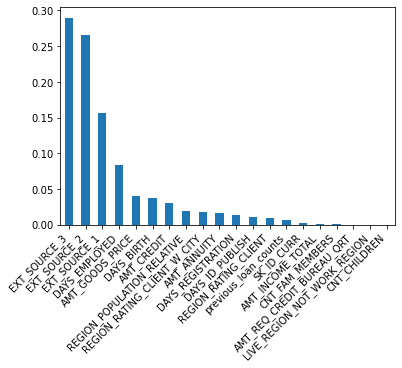

In [120]:
rf_importances.plot.bar()
plt.xticks(rotation = 45, ha='right')